In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
#import keras

import time
import pickle

%matplotlib inline

print("All imported successfully!")


All imported successfully!


In [2]:
#Read data

train_file = "Data/zip_train.txt"

train_data = pd.read_csv(train_file, sep=' ', header = None)
print("train shape:", train_data.shape)
print(type(train_data))
print(train_data.head(3))


train shape: (7291, 258)
<class 'pandas.core.frame.DataFrame'>
   0    1    2    3      4      5      6      7      8      9   ...     248  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 ...   0.823   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 ...  -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 ...  -1.000   

     249    250    251    252    253    254    255  256  257  
0  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  NaN  
1 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
2 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  

[3 rows x 258 columns]


In [3]:
#for some reason there is an extra column at the end where all the values seemed like nonzero. 
# We can safely drop that one, but just checking if it indeed has all nonzeroes, or if there are 
# any other missing value in any other column.

print(train_data.isnull().sum(axis = 0).nonzero())

(array([257]),)


In [4]:
#drop last column
train_data.drop([257], axis = 1, inplace = True)
print("train shape:", train_data.shape)
print(train_data.head(3))


train shape: (7291, 257)
   0    1    2    3      4      5      6      7      8      9   ...     247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 ...   0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 ...  -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 ...  -1.000   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  

[3 rows x 257 columns]


In [5]:
#read test file

test_file = "Data/zip_test.txt"

test_data = pd.read_csv(test_file, sep=' ', header = None)
print("test shape:", test_data.shape)
print(type(test_data))
print(test_data.head(3))


test shape: (2007, 258)
<class 'pandas.core.frame.DataFrame'>
   0    1    2    3    4      5    6      7      8      9   ...   248    249  \
0    9  NaN -1.0 -1.0 -1.0 -1.000 -1.0 -0.948 -0.561  0.148 ...  -1.0 -0.908   
1    6  NaN -1.0 -1.0 -1.0 -1.000 -1.0 -1.000 -1.000 -1.000 ...  -1.0 -1.000   
2    3  NaN -1.0 -1.0 -1.0 -0.593  0.7  1.000  1.000  1.000 ...   1.0  0.717   

     250    251    252  253  254  255  256  257  
0  0.430  0.622 -0.973 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0  
2  0.333  0.162 -0.393 -1.0 -1.0 -1.0 -1.0 -1.0  

[3 rows x 258 columns]


In [6]:
#check for null values
print(test_data.isnull().sum(axis = 0).nonzero()) 
#test_data.isnull().sum(axis = 0)



(array([1]),)


In [7]:
#this time the column 1 is null, so drop it.
test_data.drop([1], axis = 1, inplace = True)
print("test shape:", test_data.shape)
print(test_data.head(3))


test shape: (2007, 257)
   0    2    3    4      5    6      7      8      9      10  ...   248  \
0    9 -1.0 -1.0 -1.0 -1.000 -1.0 -0.948 -0.561  0.148  0.384 ...  -1.0   
1    6 -1.0 -1.0 -1.0 -1.000 -1.0 -1.000 -1.000 -1.000 -1.000 ...  -1.0   
2    3 -1.0 -1.0 -1.0 -0.593  0.7  1.000  1.000  1.000  1.000 ...   1.0   

     249    250    251    252  253  254  255  256  257  
0 -0.908  0.430  0.622 -0.973 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.000 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0  
2  0.717  0.333  0.162 -0.393 -1.0 -1.0 -1.0 -1.0 -1.0  

[3 rows x 257 columns]


In [8]:
#count frequency of each label

z_train = Counter(train_data[0])
print(sorted(z_train.items()))

[(0.0, 1194), (1.0, 1005), (2.0, 731), (3.0, 658), (4.0, 652), (5.0, 556), (6.0, 664), (7.0, 645), (8.0, 542), (9.0, 644)]


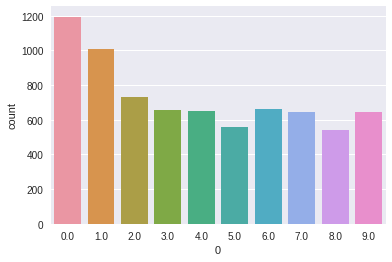

In [9]:
sns.countplot(train_data[0])

In [10]:
z_test = Counter(test_data[0])
print(sorted(z_test.items()))

[(0, 359), (1, 264), (2, 198), (3, 166), (4, 200), (5, 160), (6, 170), (7, 147), (8, 166), (9, 177)]


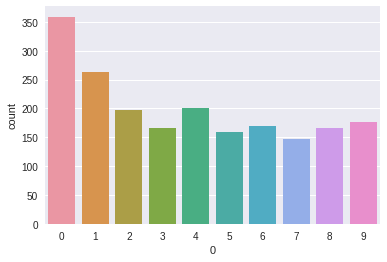

In [11]:
sns.countplot(test_data[0])

In [12]:
#get x and y datasets

x_train = (train_data.iloc[:, 1:].values).astype("float32")
y_train = (train_data.iloc[:, 0].values).astype("int32")
x_test = (test_data.iloc[:, 1:].values).astype("float32")
y_test = (test_data.iloc[:, 0].values).astype("int32")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7291, 256)
(7291,)
(2007, 256)
(2007,)


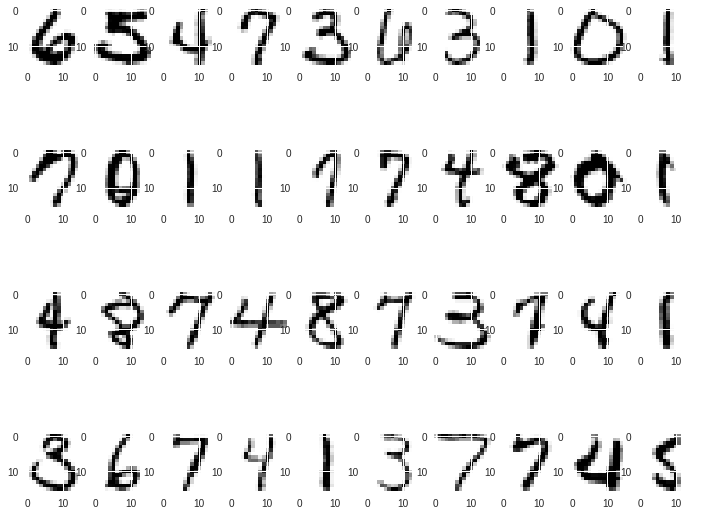

In [13]:
%matplotlib inline
#visualize some of the digits

plt.figure(figsize = (12,10))
x,y = 10,4
for i in range(40):
    plt.subplot(y,x,i+1)
    plt.imshow(x_train[i].reshape((16,16)), interpolation = "nearest")
plt.show()

In [14]:
#reshape to match Keras's expectations
#not needed for the fully conencted layer

#X_train = x_train.reshape(x_train.shape[0], 16, 16, 1)
#X_test = x_test.reshape(x_test.shape[0], 16, 16, 1)
X_train = x_train
X_test = x_test
    
print(X_train.shape)
print(X_test.shape)

(7291, 256)
(2007, 256)


In [15]:
#ok, lets start the fun

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, LocallyConnected2D
from sklearn.model_selection import train_test_split

print("all imported.")

Using TensorFlow backend.


all imported.


In [29]:
num_classes = 10
#input_shape = X_train.shape[1]
#print("input_shape:", input_shape)

batch_size = 64
epochs = 20

In [30]:
#convert class vectors to binary clas metrices with one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
print(y_train_cat.shape)
print(y_test_cat.shape)

(7291, 10)
(2007, 10)


In [31]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train_cat, test_size = 0.1, random_state = 42)
print(X_train_train.shape)
print(y_train_train.shape)
print(X_train_val.shape)
print(y_train_val.shape)

(6561, 256)
(6561, 10)
(730, 256)
(730, 10)


In [69]:
# first deep network. Need to have at least four layers, 
# relu must be used in at least one layer, sigmoid/tanh must be used in at least one.
# This one needs to be fully connected.

model1 = Sequential()

#this offered 98% accuracy in training, 94% in validation, and 90% in testing.
#model1.add(Dense(10, activation = "tanh", input_shape = (X_train.shape[1],)))
#model1.add(Dense(10, activation = "relu"))
#model1.add(Dense(10, activation = "relu"))

#lets try and if increasing the number of neurons help or not.
#model1.add(Dense(20, activation = "tanh", input_shape = (X_train.shape[1],)))
#model1.add(Dense(20, activation = "relu"))
#model1.add(Dense(20, activation = "relu"))
#this offered 98.8% accuracy in training, 95.5% in validation, and 92% in testing.

#so increase the neurons drastically and see what we get
#model1.add(Dense(100, activation = "tanh", input_shape = (X_train.shape[1],)))
#model1.add(Dense(100, activation = "relu"))
#model1.add(Dense(100, activation = "relu"))
#this offered 99% accuracy in training, 98% in validation, and 93% in testing.

#lets try relu over tanh and see what happens.
#model1.add(Dense(20, activation = "relu", input_shape = (X_train.shape[1],)))
#model1.add(Dense(20, activation = "relu"))
#model1.add(Dense(20, activation = "relu"))
#this offered 98.6% accuracy in training, 94.9% in validation, and 92.5% in testing.
#so looks like swapping tanh for relu doesn't help.

#lets have five layers instead of four.
#model1.add(Dense(20, activation = "tanh", input_shape = (X_train.shape[1],)))
#model1.add(Dense(20, activation = "relu"))
#model1.add(Dense(20, activation = "relu"))
#model1.add(Dense(20, activation = "relu"))
#this offered 99.1% accuracy in training, 96.2% in validation, and 91.3% in testing.
#so is actually overfitting.

#one last. Use a monstrous amout of neurons. 1000 in each layer. 
model1.add(Dense(1000, activation = "tanh", input_shape = (X_train.shape[1],)))
model1.add(Dense(1000, activation = "relu"))
model1.add(Dense(1000, activation = "relu"))
#this offered 99% accuracy in training, 97.8% in validation, and 94% in testing.
#So it is slowly improving, but at this rate it'll take millions of neurons to get close
#to 98-99% in testing.

#So I guess this is the ceiling here. Let's try another model.


model1.add(Dense(num_classes, activation = "softmax"))

model1.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.RMSprop(), 
              metrics = ["accuracy"])

print("model1 created.")

model1.summary()


model1 created.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_36 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10010     
Total params: 2,269,010
Trainable params: 2,269,010
Non-trainable params: 0
_________________________________________________________________


## trainings are done in Tesla. So comment the block here.

In [20]:
#parameters: 256 * 10 + 10 = 2570, 10 * 10 + 10 = 110 etc.

#now train it. Save the weights and history.

#start_time = time.time()

#h = model1.fit(X_train_train, y_train_train, batch_size = batch_size, epochs = epochs, validation_data = (X_train_val, y_train_val), verbose = 1)

#model.save_weights("model1_weights.h5")
#pickle.dump(h.history, open("model1_history.pk","wb"))

#end_time = time.time()

#print("total training time: ", end_time - start_time)


In [70]:
#traing done. So load the weights and test.

model1.load_weights("model1_weights.h5")

final_loss, final_acc = model1.evaluate(X_test, y_test_cat, verbose = 0)
print("final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))


final loss: 0.567195, final accuracy: 0.940708


(2007, 10)
(2007,)
(2007,)


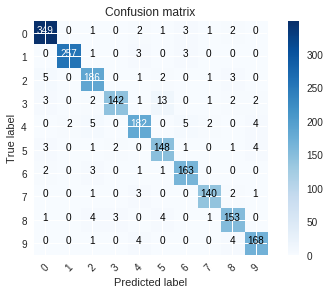

In [71]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(X_test)
print(Y_pred.shape)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print(Y_pred_classes.shape)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat, axis = 1) 
print(Y_true.shape)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [72]:
#load model history
import pickle

hist = pickle.load(open("model1_history.pk","rb"))
print(hist.keys())

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])


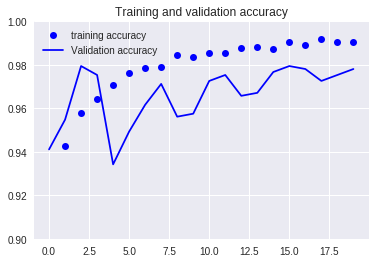

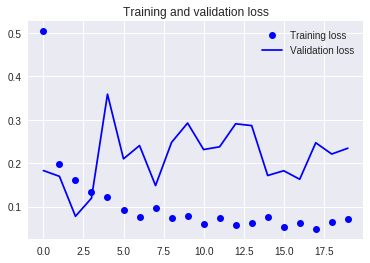

training accuracy: [0.85535741501002749, 0.94284407864654773, 0.95762841030330748, 0.96433470507544583, 0.97088858419357871, 0.97622313686231887, 0.97866178950673288, 0.97881420515165374, 0.98430117360158509, 0.98338667900528487, 0.98536808413351629, 0.98536808413351629, 0.98765432098765427, 0.98826398414875782, 0.98719707361682674, 0.99039780521262, 0.98933089468068891, 0.99192196311537872, 0.99039780535797506, 0.99039780521262]
validation accuracy: [0.94109588943115652, 0.9547945207112456, 0.97945205381471812, 0.9753424647736223, 0.93424657452596382, 0.9493150686564511, 0.96164383479993643, 0.9712328768756292, 0.95616438274514182, 0.95753424559554012, 0.97260274005262815, 0.9753424647736223, 0.96575342367773187, 0.96712328783453327, 0.97671232778732087, 0.97945205495782095, 0.97808219194412227, 0.97260273874622505, 0.9753424647736223, 0.97808219194412227]


In [73]:
accuracy = hist["acc"]
val_accuracy = hist["val_acc"]
loss = hist["loss"]
val_loss = hist["val_loss"]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "bo", label = "training accuracy")
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.ylim(0.9, 1)
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
               
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print("training accuracy:", accuracy)
#print("average training accuracy:", np.mean(accuracy))

print("validation accuracy:", val_accuracy)
#print("average validation accuracy:", np.mean(val_accuracy))


In [51]:
#lets manually examine some errors
errors = (Y_pred_classes - Y_true != 0)
print(errors.shape)
print(errors[:10])
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]
print(Y_pred_classes_errors.shape)
print(Y_pred_errors.shape)
print(Y_true_errors.shape)
print(X_val_errors.shape)

(2007,)
[False False False False False False False False False False]
(142,)
(142, 10)
(142,)
(142, 256)


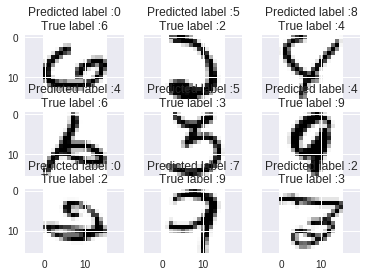

In [39]:
#show the errors
%matplotlib inline

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((16,16)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 6 errors
#display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
display_errors([x for x in range(10)], X_val_errors, Y_pred_classes_errors, Y_true_errors)

(2007,)
[9 6 3 6 6 0 0 0 6 9 6 2 2 4 0 3 1 4 9 6]
(2007,)
[9 6 3 6 6 0 0 0 6 9 6 2 2 4 0 3 1 6 9 6]


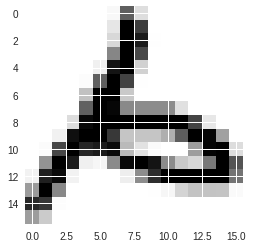

In [53]:
print(Y_pred_classes.shape)
print(Y_pred_classes[:20])
print(Y_true.shape)
print(Y_true[:20])

#12 mismatched. Manually check it. (predicted 3, true value 2)
plt.imshow(X_test[17].reshape(16,16))
